In [0]:
import warnings
warnings.filterwarnings(action='ignore')
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Flatten,BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16

In [0]:
TRAIN_DIR = '/content/cat-and-dog/training_set/training_set'
VALID_DIR = '/content/cat-and-dog/test_set/test_set'

In [8]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
TRAIN_DATA_GEN = ImageDataGenerator(rescale=1.0/255.0,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,height_shift_range=0.1,width_shift_range=0.1,rotation_range=30).flow_from_directory(TRAIN_DIR,color_mode='rgb',target_size=(IMAGE_WIDTH,IMAGE_HEIGHT),batch_size=64)
VALID_DATA_GEN = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(VALID_DIR,color_mode='rgb',target_size=(IMAGE_WIDTH,IMAGE_HEIGHT),batch_size=64)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


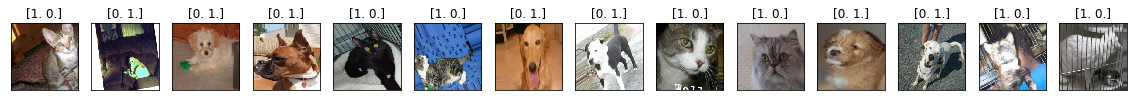

In [13]:
first_batch = TRAIN_DATA_GEN.next()
i = 0
_,ax = plt.subplots(1,14,figsize=(20,2))
for image,label in zip(first_batch[0][:14],first_batch[1][:14]):
  ax[i].imshow(image.reshape(IMAGE_WIDTH,IMAGE_HEIGHT,3))
  ax[i].set_title(str(label))
  ax[i].set_xticks([])
  ax[i].set_yticks([])
  i+=1

In [0]:
vgg_Model_update = Sequential()
for layer in vgg_Model.layers[:-1]:
  vgg_Model_update.add(layer)
for layer in vgg_Model_update.layers:
  layer.trainable = False
vgg_Model_update.add(Dense(2,activation='softmax'))

In [24]:
vgg_Model_update.compile(loss=categorical_crossentropy,optimizer = Adam(lr=0.003),metrics=['acc'])
vgg_Model_update.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [0]:
early_stopping = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [27]:
history = vgg_Model_update.fit_generator(TRAIN_DATA_GEN,steps_per_epoch=TRAIN_DATA_GEN.n//TRAIN_DATA_GEN.batch_size,
                                         epochs=50,
                                         validation_data=VALID_DATA_GEN,
                                         validation_steps=VALID_DATA_GEN.n//VALID_DATA_GEN.batch_size,
                                         callbacks=[early_stopping])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
125/125 [==============================] - 149s 1s/step - loss: 0.5907 - acc: 0.7249 - val_loss: 0.3955 - val_acc: 0.8145
Epoch 2/50
125/125 [==============================] - 146s 1s/step - loss: 0.3683 - acc: 0.8294 - val_loss: 0.2734 - val_acc: 0.8816
Epoch 3/50
125/125 [==============================] - 142s 1s/step - loss: 0.3724 - acc: 0.8245 - val_loss: 0.3252 - val_acc: 0.8586
Epoch 4/50
125/125 [==============================] - 140s 1s/step - loss: 0.3159 - acc: 0.8617 - val_loss: 0.2877 - val_acc: 0.8698
Epoch 5/50
125/125 [==============================] - 141s 1s/step - loss: 0.3075 - acc: 0.8678 - val_loss: 0.2494 - val_acc: 0.8923
Epoch 6/50
125/125 [==============================] - 140s 1s/step - loss: 0.3324 - acc: 0.8551 - val_loss: 0.2371 - val_acc: 0.8964
Epoch 7/50
125/125 [==============================] - 140s 1s/step - loss: 0.3096 - acc: 0.8672 - val_loss

Text(0.5, 1.0, 'Accuracy')

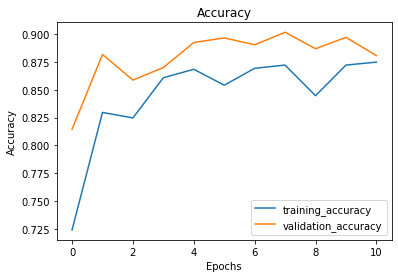

In [28]:
plt.plot(history.history['acc'],label='training_accuracy')
plt.plot(history.history['val_acc'],label='validation_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy")

Text(0.5, 1.0, 'Loss')

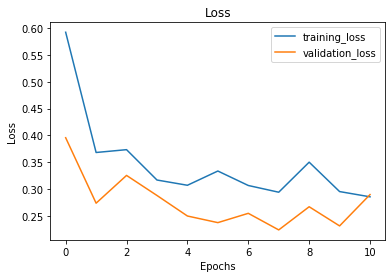

In [29]:
plt.plot(history.history['loss'],label='training_loss')
plt.plot(history.history['val_loss'],label='validation_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss")

In [30]:
vgg_Model_update.evaluate_generator(VALID_DATA_GEN,steps=VALID_DATA_GEN.n//VALID_DATA_GEN.batch_size)

[0.22942459967828566, 0.8991935483870968]

In [0]:
vgg_Model_update.save('Cats_vs_Dogs_VGG16_90_ACC.h5')